# Registration exercice
There will be  basically two steps in this only exercice.
*   First step is to register the two multimodal images with 2 different model of transformation: translation only, affine and non rigid.
*   The second step will be to compare and comment about the results you have obtained.
*   Once done, you will print your notebook (`File> Print` as pdf) with the resulting cells and send it back by email.




##SETUP:
This notebook was designed to be able to run from GOOGLE COLAB, it has then some limited visualisation option. We will use only two libraries: `simpleElastix` for image registration, and `matplotlib` (installed by default in google colab) for plotting and visualisation of images. We use a Python kernel.

We will also get the two example images

In [1]:

!pip install SimpleITK-SimpleElastix


In [2]:
!wget https://github.com/bogovicj/emboBioImage2023_registration/raw/main/sampleImages/ct_2d_moving.tif
!wget https://github.com/bogovicj/emboBioImage2023_registration/raw/main/sampleImages/mri_2d.tif

--2023-09-15 12:59:39--  https://github.com/bogovicj/emboBioImage2023_registration/raw/main/sampleImages/ct_2d_moving.tif
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bogovicj/emboBioImage2023_registration/main/sampleImages/ct_2d_moving.tif [following]
--2023-09-15 12:59:39--  https://raw.githubusercontent.com/bogovicj/emboBioImage2023_registration/main/sampleImages/ct_2d_moving.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988870 (966K) [image/tiff]
Saving to: ‘ct_2d_moving.tif.2’

ct_2d_moving.tif.2  100%[===================>] 965.69K  --.-KB/s    in 0.06s   

2023-09-15 12:59:39 (15.

# STEP 1: Registering images using SimpleElastix

The Rigid registration Cells are provided, you will have to complete the empty cells to add the Affine and Non Rigid Registration

In [3]:

import SimpleITK as sitk
import matplotlib.pyplot as plt




## Read and display Images

In [4]:
movingImage = sitk.ReadImage("ct_2d_moving.tif")
movingImage.GetDimension()


2

In [5]:
fixedImage = sitk.ReadImage('mri_2d.tif')

In [6]:
movingImageArray=sitk.GetArrayFromImage(movingImage)
fixedImageArray=sitk.GetArrayFromImage(fixedImage)

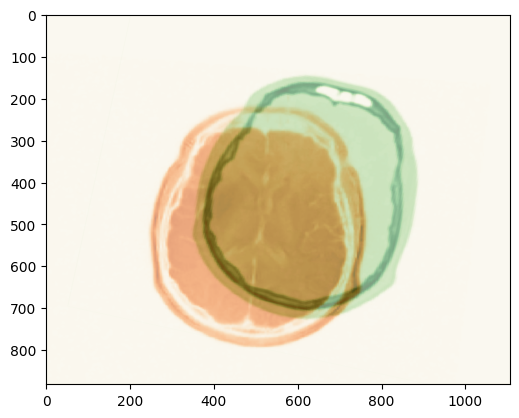

In [7]:
plt.imshow(movingImageArray,cmap='Greens', vmin=0, vmax=255)

plt.imshow(fixedImageArray, alpha=0.5,cmap='Oranges', vmin=0, vmax=255)

## Hints: example of Rigid Registration with default parameters

In [8]:
elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(sitk.GetDefaultParameterMap("rigid"))
elastixImageFilter.Execute()
outputImage=elastixImageFilter.GetResultImage()

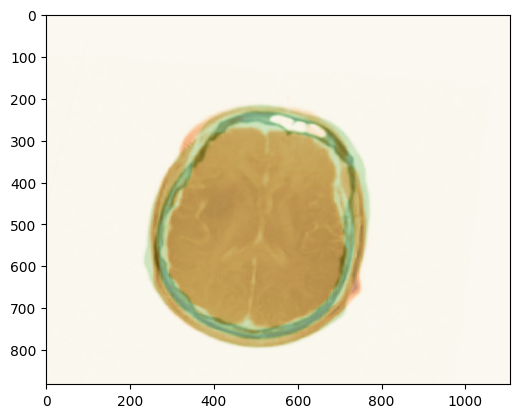

In [9]:
outputImageArray=sitk.GetArrayFromImage(outputImage)
plt.imshow(outputImageArray,cmap='Greens', vmin=0, vmax=255)

plt.imshow(fixedImageArray, alpha=0.5,cmap='Oranges', vmin=0, vmax=255)

In [10]:
p=sitk.GetDefaultParameterMap("translation")
for keys,values in p.items():
    print(keys)
    print(values)


AutomaticParameterEstimation
('true',)
AutomaticTransformInitialization
('true',)
CheckNumberOfSamples
('true',)
DefaultPixelValue
('0.0',)
FinalBSplineInterpolationOrder
('3',)
FixedImagePyramid
('FixedSmoothingImagePyramid',)
ImageSampler
('RandomCoordinate',)
Interpolator
('LinearInterpolator',)
MaximumNumberOfIterations
('256',)
MaximumNumberOfSamplingAttempts
('8',)
Metric
('AdvancedMattesMutualInformation',)
MovingImagePyramid
('MovingSmoothingImagePyramid',)
NewSamplesEveryIteration
('true',)
NumberOfResolutions
('4',)
NumberOfSamplesForExactGradient
('4096',)
NumberOfSpatialSamples
('2048',)
Optimizer
('AdaptiveStochasticGradientDescent',)
Registration
('MultiResolutionRegistration',)
ResampleInterpolator
('FinalBSplineInterpolator',)
Resampler
('DefaultResampler',)
ResultImageFormat
('nii',)
Transform
('TranslationTransform',)
WriteIterationInfo
('false',)
WriteResultImage
('true',)


## Hints: How to change parameters?
Below please find an example about how to modify the registration parameters : here the transform basis.

The list of available parameters and their description are accessible here:
https://github.com/SuperElastix/elastix/tree/4d028f73990347066f8223c2f594e8ae9ae333bb/Components




In [11]:
p['Transform'] = ['BSplineTransform']
elastixImageFilter.SetParameterMap(p)
elastixImageFilter.Execute()
outputImage=elastixImageFilter.GetResultImage()

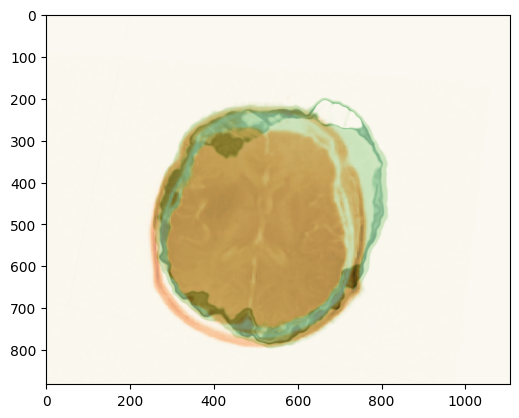

In [12]:
outputImageArray=sitk.GetArrayFromImage(outputImage)
plt.imshow(outputImageArray,cmap='Greens', vmin=0, vmax=255)

plt.imshow(fixedImageArray, alpha=0.5,cmap='Oranges', vmin=0, vmax=255)

## YOUR TURN
### Exercice 1: Rigid registration
Please add below the code cell to get the best as you can rigid registration, changing the parameter map.

### Exercice 2: Affine registration
Please add below the code cell to get the best as you can affine registration, changing the parameter map.

### Exercice 3: Non Rigid registration
Please add below the code cell to get the best as you can non rigid registration, changing the parameter map.

# STEP 2: compare and comment about the results

## Hints: How to print the value of a metric
(not super direct here: we perform an identity registration just to get access to the metric)

In [13]:

Reg = sitk.ImageRegistrationMethod()

Reg.SetOptimizerAsGradientDescentLineSearch(learningRate=1.0,numberOfIterations=0,convergenceMinimumValue=1e-5,convergenceWindowSize=5)
Reg.SetMetricSamplingPercentage(1000.0)
Reg.SetInitialTransform(sitk.Transform(2,sitk.sitkIdentity))
#Reg.SetMetricAsMattesMutualInformation(numberOfHistogramBins = 32)
#Reg.SetMetricAsMeanSquares()
Reg.SetMetricAsCorrelation() # Warning all metrics are made negative if needed such that a minimum is search for. More info on each metric by keeping your mouse o the method.
before = Reg.MetricEvaluate(sitk.Cast(fixedImage,sitk.sitkFloat64),sitk.Cast(movingImage,sitk.sitkFloat64))
after= Reg.MetricEvaluate(sitk.Cast(fixedImage,sitk.sitkFloat64),sitk.Cast(outputImage,sitk.sitkFloat64))




In [14]:
before

-0.29621665480686316

In [15]:
after

-0.5335352616727597

## Your turn

Feel free to add cell of codes and text. Do not forget to print the result as pdf to sed it to us, together with the ipynb file.